Lung Cancer Research Project



Clean Up Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
import hvplot.pandas
from scipy.stats import pointbiserialr

# Import the OpenWeatherMap API key
from api_key import weather_api_key


In [3]:
#set file path
cancer_data_path = "cancer patient data sets.csv"
#read the file path
cancer_data = pd.read_csv(cancer_data_path)
cancer_data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
#cleaning data - checking that all columns are filled out
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [5]:
#cleaning data - create new data frame that removes excess columnns
clean_cancer = cancer_data[["Patient Id", "Age", "Gender", "Air Pollution", "Alcohol use", "Genetic Risk", "Obesity", "Smoking", "Passive Smoker", "Level"]]
clean_cancer = clean_cancer.copy()
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level
0,P1,33,1,2,4,3,4,3,2,Low
1,P10,17,1,3,1,4,2,2,4,Medium
2,P100,35,1,4,5,5,7,2,3,High
3,P1000,37,1,7,7,6,7,7,7,High
4,P101,46,1,6,8,7,7,8,7,High


In [9]:
clean_cancer.loc[clean_cancer["Gender"] == 1, "Gender"] = "Male"
clean_cancer.loc[clean_cancer["Gender"] == 2, "Gender"] = "Female"
clean_cancer.head()

/var/folders/5k/_yxk9n810sqfyd87_kzfpfbm0000gn/T/ipykernel_92921/2027952849.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  clean_cancer.loc[clean_cancer["Gender"] == 1, "Gender"] = "Male"


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level
0,P1,33,Male,2,4,3,4,3,2,Low
1,P10,17,Male,3,1,4,2,2,4,Medium
2,P100,35,Male,4,5,5,7,2,3,High
3,P1000,37,Male,7,7,6,7,7,7,High
4,P101,46,Male,6,8,7,7,8,7,High


Question 1 - How do the risk factors differ for different age groups of patients?

Question 2 - How do the risk factors differ for male vs female patients?

In [10]:
risk_factors = ['Air Pollution', 'Alcohol use',
                'Genetic Risk', 'Obesity',
                'Smoking', 'Passive Smoker']

# Compute the median of risk factors by gender
median_risk_factors_by_gender = clean_cancer.groupby('Gender')[risk_factors].median()

# Reset the index if necessary
# median_risk_factors_by_gender.reset_index(inplace=True)

# Display the median values for risk factors by gender
print(median_risk_factors_by_gender)

        Air Pollution  Alcohol use  Genetic Risk  Obesity  Smoking  \
Gender                                                               
Female            3.0          2.0           3.0      4.0      3.0   
Male              5.0          6.0           6.0      4.0      4.0   

        Passive Smoker  
Gender                  
Female             3.0  
Male               4.0  


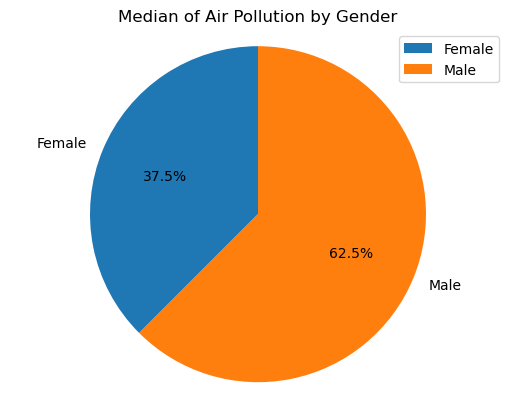

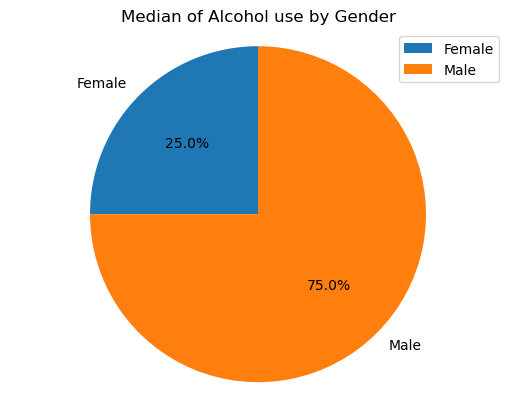

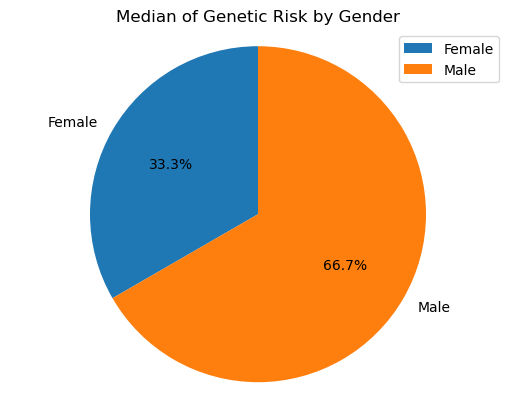

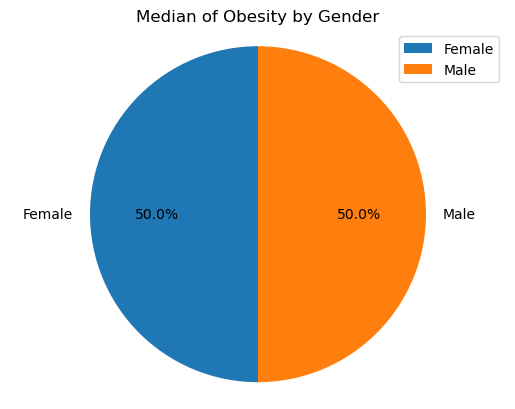

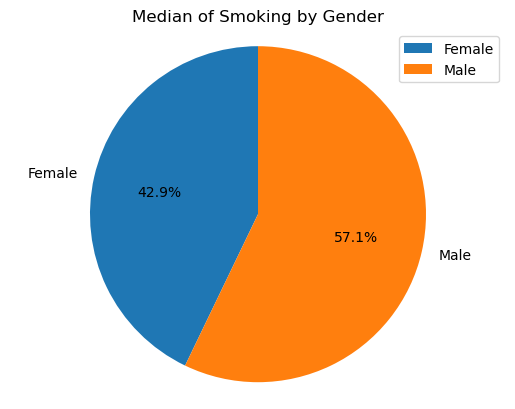

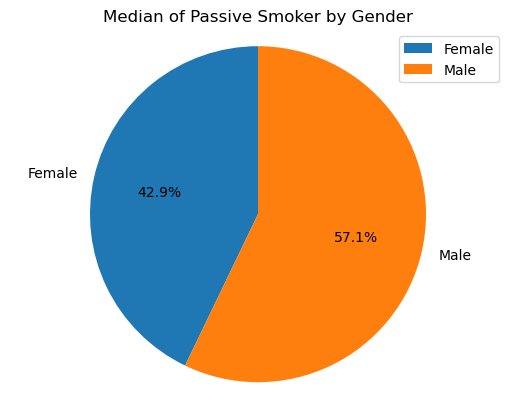

In [11]:
# Iterate through each risk factor
for factor in risk_factors:
    # Get median values for each gender category for the current risk factor
    median_values = median_risk_factors_by_gender[factor]

    # Create a pie chart for median values of risk factor by gender
    fig, ax = plt.subplots()
    ax.pie(median_values, labels=median_values.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Median of {factor} by Gender')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Add a legend
    ax.legend(median_values.index, loc='upper right')
    
    plt.show()

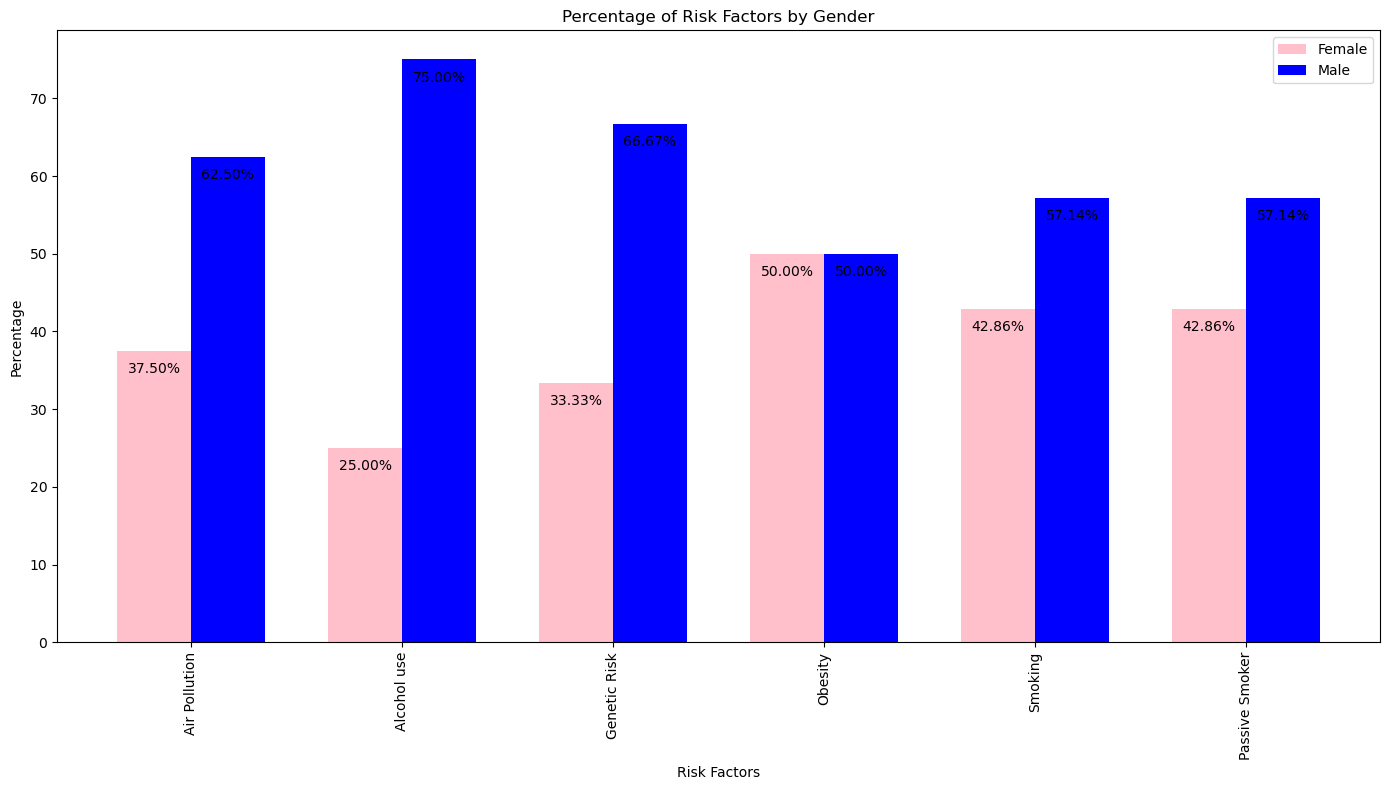

In [12]:
# Extract median values for females and males for each risk factor
median_female_values = [median_risk_factors_by_gender.loc['Female', factor] for factor in risk_factors]
median_male_values = [median_risk_factors_by_gender.loc['Male', factor] for factor in risk_factors]

# Calculate total median values for each risk factor
total_values = [female + male for female, male in zip(median_female_values, median_male_values)]

# Calculate percentage values for females and males
female_percentages = [female / total * 100 for female, total in zip(median_female_values, total_values)]
male_percentages = [male / total * 100 for male, total in zip(median_male_values, total_values)]

# Create arrays for the position of bars
ind = np.arange(len(risk_factors))  # the x locations for the groups
width = 0.35  # the width of the bars

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars for females and males
bars1 = ax.bar(ind, female_percentages, width, color='pink', label='Female')
bars2 = ax.bar(ind + width, male_percentages, width, color='blue', label='Male')

# Add labels and title
ax.set_xlabel('Risk Factors')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Risk Factors by Gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(risk_factors, rotation=90)
ax.legend()

# Add percentage labels on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        va = 'bottom' if height < 20 else 'top'  # Alternate label position based on bar height
        ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3) if va == 'bottom' else (0, -8),  # Set vertical offset
                    textcoords="offset points",
                    ha='center', va=va, color='black')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()


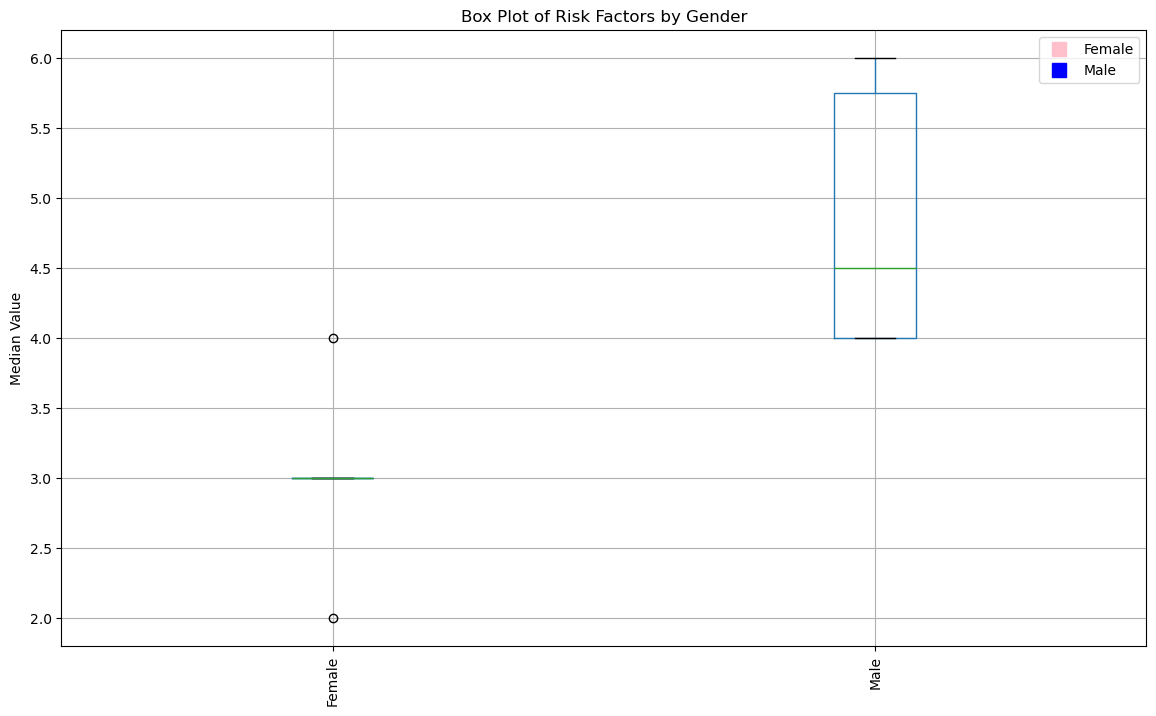

In [16]:
# Extract median values for females and males for each risk factor
median_female_values = [median_risk_factors_by_gender.loc['Female', factor] for factor in risk_factors]
median_male_values = [median_risk_factors_by_gender.loc['Male', factor] for factor in risk_factors]

# Create a DataFrame for box plot
data = pd.DataFrame({'Female': median_female_values, 'Male': median_male_values}, index=risk_factors)

# Create box plot
plt.figure(figsize=(14, 8))
boxplot = data.boxplot()

# Add legend
female_patch = plt.plot([], marker='s', markersize=10, color="pink", linestyle='None', label='Female')[0]
male_patch = plt.plot([], marker='s', markersize=10, color="blue", linestyle='None', label='Male')[0]
plt.legend(handles=[female_patch, male_patch], loc='upper right')

# Set labels and title
plt.title('Box Plot of Risk Factors by Gender')
plt.ylabel('Median Value')
plt.xticks(rotation=90)
plt.show()


In [17]:
cancer_level_gender_df = clean_cancer.groupby(['Level','Gender'])[['Patient Id']].count().reset_index()
cancer_level_gender_df.columns = ['Cancer Level','Gender','Patient Count']
cancer_level_gender_df

,Cancer Level,Gender,Patient Count
0,High,Female,113
1,High,Male,252
2,Low,Female,154
3,Low,Male,149
4,Medium,Female,135
5,Medium,Male,197


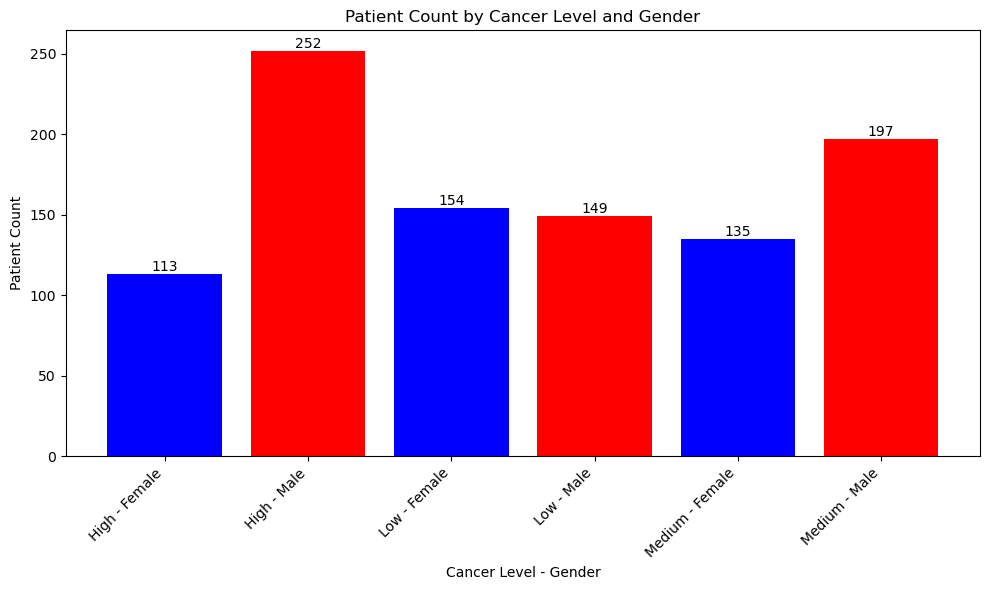

In [18]:
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(cancer_level_gender_df['Cancer Level'] + ' - ' + cancer_level_gender_df['Gender'],
               cancer_level_gender_df['Patient Count'], color=['blue', 'red'])

# Add labels and title
plt.xlabel('Cancer Level - Gender')
plt.ylabel('Patient Count')
plt.title('Patient Count by Cancer Level and Gender')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add patient count on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom', color='black')

# Show plot
plt.tight_layout()
plt.show()

Question 3 - What is the relation of pollution to the level of cancer in patients?

In [5]:
#find the average air pollution level
print(f"The overall average of air pollution is {clean_cancer['Air Pollution'].mean()}")
low_level = clean_cancer.loc[clean_cancer["Level"]== "Low"]
medium_level = clean_cancer.loc[clean_cancer["Level"]== "Medium"]
high_level = clean_cancer.loc[clean_cancer["Level"] == "High"]
print(f"The average of air pollution for those with low-level cancer is {low_level['Air Pollution'].mean()}")
print(f"The average of air pollution for those with medium-level cancer is {medium_level['Air Pollution'].mean()}")
print(f"The average of air pollution for those with high-level cancer is {high_level['Air Pollution'].mean()}")

The overall average of air pollution is 3.84
The average of air pollution for those with low-level cancer is 2.6006600660066006
The average of air pollution for those with medium-level cancer is 2.933734939759036
The average of air pollution for those with high-level cancer is 5.693150684931507


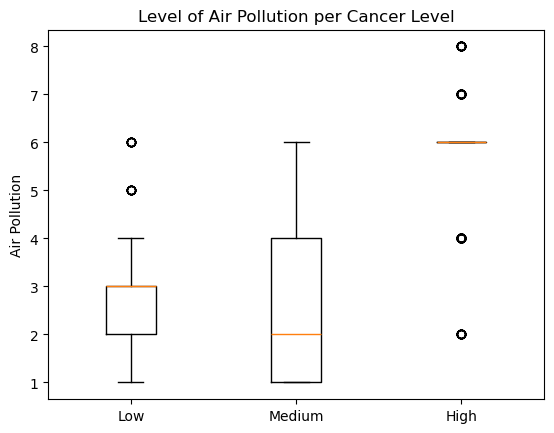

In [6]:
#create a box plot showing level of air pollution to level of cancer
levels = ["Low", "Medium", "High"]
air_pollution = []

for level in levels:
    pollution_value = clean_cancer.loc[clean_cancer["Level"] == level,"Air Pollution"]
    air_pollution.append(pollution_value)
    quartiles = pollution_value.quantile([0.25,0.5,0.75])

plt.ylabel("Air Pollution")
plt.boxplot(air_pollution, labels=levels)
plt.title("Level of Air Pollution per Cancer Level")
plt.show()

In [9]:
#find the correlation between air pollution and level of cancer
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
clean_cancer['Level'] = clean_cancer['Level'].map(level_mapping)

# Calculate correlation coefficient
correlation_coefficient, p_value = pointbiserialr(clean_cancer['Air Pollution'], clean_cancer['Level'])

print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation coefficient: 0.6360384924565836
p-value: 1.769224974180674e-114


In [10]:
#remove mapping
level_mapping = {1: 'Low', 2: 'Medium', 3: 'High'}

# Apply level mapping to 'Level' column
clean_cancer['Level'] = clean_cancer['Level'].replace({1: 'Low', 2: 'Medium', 3: 'High'})

API: Looking at 30 major world cities and their current level of air pollution

In [8]:
cities = ["Tokyo", "New York City", "Los Angeles", "Delhi", "Shanghai", "Sao Paulo", "Mexico City", "Cairo", "Mumbai", "Beijing", "Dhaka", "Osaka",
          "Karachi", "Buenos Aires", "Chongqing", "Istanbul", "Kolkata", "Manila", "Lagos", "Rio de Janeiro", "Tianjin", "Kinshasa", "Guangzhou", "Moscow",
          "Shenzhen", "Lahore", "Bangalore", "Paris", "Bogotá", "Jakarta"]

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key

# Define an empty list to fetch the lat and lng for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng,})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Tokyo
Processing Record 2 of Set 1 | New York City
Processing Record 3 of Set 1 | Los Angeles
Processing Record 4 of Set 1 | Delhi
Processing Record 5 of Set 1 | Shanghai
Processing Record 6 of Set 1 | Sao Paulo
Processing Record 7 of Set 1 | Mexico City
Processing Record 8 of Set 1 | Cairo
Processing Record 9 of Set 1 | Mumbai
Processing Record 10 of Set 1 | Beijing
Processing Record 11 of Set 1 | Dhaka
Processing Record 12 of Set 1 | Osaka
Processing Record 13 of Set 1 | Karachi
Processing Record 14 of Set 1 | Buenos Aires
Processing Record 15 of Set 1 | Chongqing
Processing Record 16 of Set 1 | Istanbul
Processing Record 17 of Set 1 | Kolkata
Processing Record 18 of Set 1 | Manila
Processing Record 19 of Set 1 | Lagos
Processing Record 20 of Set 1 | Rio de Janeiro
Processing Record 21 of Set 1 | Tianjin
Processing Record 22 of Set 1 | Kinshasa
Processing Record 23 of Set 1 | Guangzhou
Processi

In [9]:
#create a data frame
city_df = pd.DataFrame(city_data)
city_df

,City,Lat,Lng
0,Tokyo,35.6895,139.6917
1,New York City,40.7143,-74.0060
2,Los Angeles,34.0522,-118.2437
3,Delhi,28.6667,77.2167
4,Shanghai,31.2222,121.4581
5,Sao Paulo,-23.5475,-46.6361
6,Mexico City,19.4285,-99.1277
7,Cairo,30.0626,31.2497
8,Mumbai,19.0144,72.8479
9,Beijing,39.9075,116.3972


In [10]:
query_url = "http://api.openweathermap.org/data/2.5/air_pollution?"
pollution_data = []
# Iterate through the DataFrame
for index, row in city_df.iterrows():
    lat = row['Lat']
    lon = row['Lng']
    
    # Create the API URL
    api_call_url = f"{query_url}lat={lat}&lon={lon}&appid={weather_api_key}"
    
    pollution = requests.get(api_call_url).json()

     # Parse out the different air quality values
    city_co = pollution["list"][0]["components"]["co"]
    city_no = pollution["list"][0]["components"]["no"]
    city_no2 = pollution["list"][0]["components"]["no2"]
    city_o3 = pollution["list"][0]["components"]["o3"]
    city_so2 = pollution["list"][0]["components"]["so2"]
    city_pm2_5 = pollution["list"][0]["components"]["pm2_5"]
    city_pm10 = pollution["list"][0]["components"]["pm10"]
    city_nh3 =  pollution["list"][0]["components"]["nh3"]

    # Add the data to the pollution_data list
    pollution_data.append({"Lat": lat,
                      "Lng": lon,
                        "CO": city_co, 
                          "NO": city_no, 
                          "NO2": city_no2,
                          "O3": city_o3,
                          "SO2": city_so2,
                          "PM2_5": city_pm2_5,
                          "PM10": city_pm10,
                          "NH3": city_nh3})

In [11]:
#create a data frame
pollution_df = pd.DataFrame(pollution_data)
pollution_df

,Lat,Lng,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3
0,35.6895,139.6917,894.55,216.37,108.30,13.23,217.44,43.47,57.12,17.48
1,40.7143,-74.0060,1028.06,81.36,80.20,0.00,15.26,46.55,58.40,2.72
2,34.0522,-118.2437,934.60,51.41,111.04,0.00,7.75,39.29,68.05,10.13
3,28.6667,77.2167,3471.38,38.89,36.33,0.87,26.23,514.02,643.25,18.75
4,31.2222,121.4581,7049.56,379.09,164.51,5.54,1174.93,294.68,357.89,3.23
5,-23.5475,-46.6361,614.17,10.28,21.25,0.04,7.33,13.08,36.59,2.63
6,19.4285,-99.1277,1174.93,41.57,39.07,0.00,29.33,19.66,39.07,10.26
7,30.0626,31.2497,277.04,0.00,14.74,75.10,17.88,18.34,49.61,14.44
8,19.0144,72.8479,2056.12,3.80,57.58,36.84,47.21,248.20,299.66,23.05
9,39.9075,116.3972,5821.23,332.59,116.53,4.92,217.44,525.54,657.09,77.01


In [12]:
#merge the data frame with the city with the pollution data frame
updated_city_pollution = pd.merge(city_df, pollution_df, on=["Lat", "Lng"])
updated_city_pollution

,City,Lat,Lng,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3
0,Tokyo,35.6895,139.6917,894.55,216.37,108.30,13.23,217.44,43.47,57.12,17.48
1,New York City,40.7143,-74.0060,1028.06,81.36,80.20,0.00,15.26,46.55,58.40,2.72
2,Los Angeles,34.0522,-118.2437,934.60,51.41,111.04,0.00,7.75,39.29,68.05,10.13
3,Delhi,28.6667,77.2167,3471.38,38.89,36.33,0.87,26.23,514.02,643.25,18.75
4,Shanghai,31.2222,121.4581,7049.56,379.09,164.51,5.54,1174.93,294.68,357.89,3.23
5,Sao Paulo,-23.5475,-46.6361,614.17,10.28,21.25,0.04,7.33,13.08,36.59,2.63
6,Mexico City,19.4285,-99.1277,1174.93,41.57,39.07,0.00,29.33,19.66,39.07,10.26
7,Cairo,30.0626,31.2497,277.04,0.00,14.74,75.10,17.88,18.34,49.61,14.44
8,Mumbai,19.0144,72.8479,2056.12,3.80,57.58,36.84,47.21,248.20,299.66,23.05
9,Beijing,39.9075,116.3972,5821.23,332.59,116.53,4.92,217.44,525.54,657.09,77.01


In [13]:
#create bins to show how the air quality is currently
co_bins = [0, 4400, 9400, 12400, 15400, 50000]
no2_bins = [0, 40, 70, 150, 200, 1000]
o3_bins = [0, 60, 100, 140, 180, 1000]
so2_bins = [0, 20, 80, 250, 350, 1000]
pm2_5_bins = [0, 10, 25, 50, 75, 500]
pm10_bins = [0, 20, 50, 100, 200, 1000]
labels = ["Good", "Fair", "Moderate", "Poor", "Very Poor"]
updated_city_pollution["CO Air Condition"] = pd.cut(updated_city_pollution["CO"], co_bins, 
                                        labels=labels, include_lowest=True)
updated_city_pollution["NO2 Air Condition"] = pd.cut(updated_city_pollution["NO2"], no2_bins, 
                                        labels=labels, include_lowest=True)
updated_city_pollution["O3 Air Condition"] = pd.cut(updated_city_pollution["O3"], o3_bins, 
                                        labels=labels, include_lowest=True)
updated_city_pollution["SO2 Air Condition"] = pd.cut(updated_city_pollution["SO2"], so2_bins, 
                                        labels=labels, include_lowest=True)
updated_city_pollution["PM2_5 Air Condition"] = pd.cut(updated_city_pollution["PM2_5"], pm2_5_bins, 
                                        labels=labels, include_lowest=True)
updated_city_pollution["PM10 Air Condition"] = pd.cut(updated_city_pollution["PM10"], pm10_bins, 
                                        labels=labels, include_lowest=True)
updated_city_pollution

,City,Lat,Lng,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,CO Air Condition,NO2 Air Condition,O3 Air Condition,SO2 Air Condition,PM2_5 Air Condition,PM10 Air Condition
0,Tokyo,35.6895,139.6917,894.55,216.37,108.30,13.23,217.44,43.47,57.12,17.48,Good,Moderate,Good,Moderate,Moderate,Moderate
1,New York City,40.7143,-74.0060,1028.06,81.36,80.20,0.00,15.26,46.55,58.40,2.72,Good,Moderate,Good,Good,Moderate,Moderate
2,Los Angeles,34.0522,-118.2437,934.60,51.41,111.04,0.00,7.75,39.29,68.05,10.13,Good,Moderate,Good,Good,Moderate,Moderate
3,Delhi,28.6667,77.2167,3471.38,38.89,36.33,0.87,26.23,514.02,643.25,18.75,Good,Good,Good,Fair,NaN,Very Poor
4,Shanghai,31.2222,121.4581,7049.56,379.09,164.51,5.54,1174.93,294.68,357.89,3.23,Fair,Poor,Good,NaN,Very Poor,Very Poor
5,Sao Paulo,-23.5475,-46.6361,614.17,10.28,21.25,0.04,7.33,13.08,36.59,2.63,Good,Good,Good,Good,Fair,Fair
6,Mexico City,19.4285,-99.1277,1174.93,41.57,39.07,0.00,29.33,19.66,39.07,10.26,Good,Good,Good,Fair,Fair,Fair
7,Cairo,30.0626,31.2497,277.04,0.00,14.74,75.10,17.88,18.34,49.61,14.44,Good,Good,Fair,Good,Fair,Fair
8,Mumbai,19.0144,72.8479,2056.12,3.80,57.58,36.84,47.21,248.20,299.66,23.05,Good,Fair,Good,Fair,Very Poor,Very Poor
9,Beijing,39.9075,116.3972,5821.23,332.59,116.53,4.92,217.44,525.54,657.09,77.01,Fair,Moderate,Good,Moderate,NaN,Very Poor


In [14]:
# Configure the map plot
air_map = updated_city_pollution.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    size = "PM2_5",
    color = "City")

# Display the map
air_map

/Users/sam/anaconda3/envs/dev/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,PM2_5)

Question 4 - What is the relation of smoking habits to the level of cancer in patients?

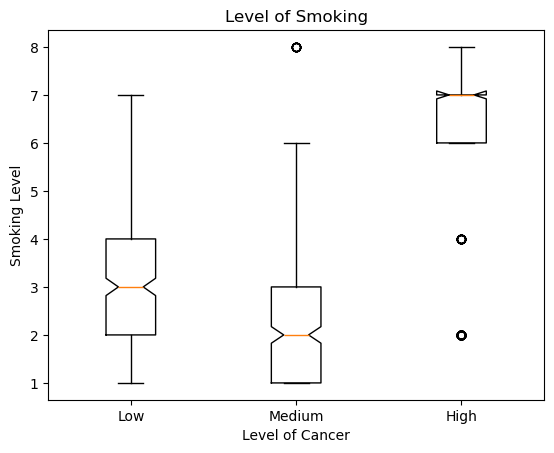

In [19]:
#Plotting box plot for smokers.
levels_s= ['Low', 'Medium', 'High']
smoking_s= []
for levels_s in levels_s:
    smoking_levels_df= cancer_data.loc[cancer_data['Level']== levels_s, 'Smoking' ]
    smoking_s.append(smoking_levels_df)
    quartiles= smoking_levels_df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

fig1, ax1 = plt.subplots()
ax1.boxplot(smoking_s, levels_s)
ax1.set_title('Level of Smoking')
ax1.set_ylabel('Smoking Level')
ax1.set_xlabel('Level of Cancer')
plt.xticks([1,2,3], ['Low', 'Medium', 'High'])
plt.show()

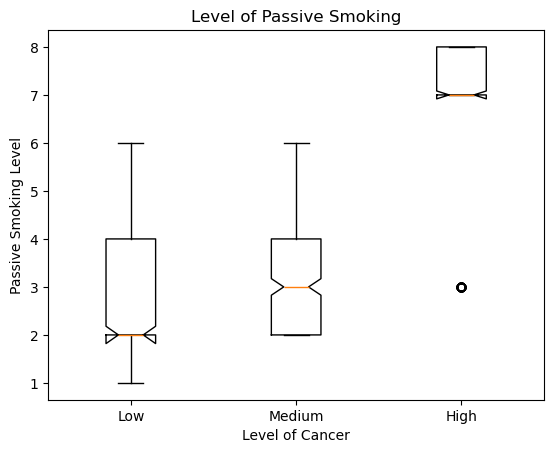

In [20]:
#Plotting Box Plot for Passive Smokers
levels_ps= ['Low', 'Medium', 'High']
smoking_ps= []
for levels_ps in levels_ps:
    passive_smoking_levels_df= cancer_data.loc[cancer_data['Level']== levels_ps, 'Passive Smoker' ]
    smoking_ps.append(passive_smoking_levels_df)
    quartiles= smoking_levels_df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
fig2, ax2 = plt.subplots()
ax2.boxplot(smoking_ps, levels_ps)
ax2.set_title('Level of Passive Smoking')
ax2.set_ylabel('Passive Smoking Level')
ax2.set_xlabel('Level of Cancer')
plt.xticks([1,2,3], ['Low', 'Medium', 'High'])
plt.show()

In [21]:
# Calculating the average for each level of cancer from smoking.
smoking_mean= cancer_data.groupby('Level')['Smoking']. mean()
smoking_mean

Level
High      6.073973
Low       3.023102
Medium    2.454819
Name: Smoking, dtype: float64

In [22]:
# Calculating the average for each level of cancer from passive smoking
passive_mean =cancer_data.groupby('Level')['Passive Smoker']. mean()
passive_mean

Level
High      6.528767
Low       2.633663
Medium    3.054217
Name: Passive Smoker, dtype: float64

In [23]:
#Grouping the data based on the lvel of Cancer
smoking_level_high= cancer_data.loc[cancer_data["Level"] == "High"] 
smoking_level_med= cancer_data.loc[cancer_data["Level"] == "Medium"] 
smoking_level_low= cancer_data.loc[cancer_data["Level"] == "Low"] 

In [24]:
smoking_bins= [1,2,3,4,5,6,8]
smoking_groups= ["None", "Low", "Moderatly Low", "Moderate", "Moderatly High", "High"]

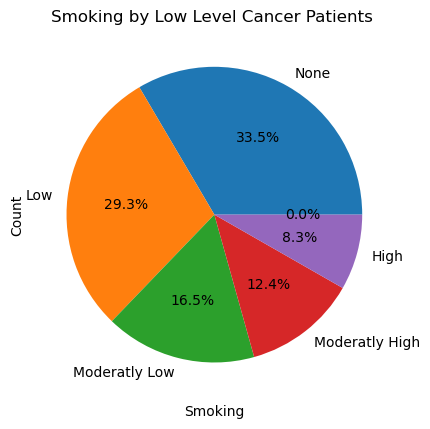

In [25]:
smoking_bins_low = pd.cut(smoking_level_low["Smoking"], smoking_bins, labels=smoking_groups)
smoking_bins_low.value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.title("Smoking by Low Level Cancer Patients ")
plt.show()

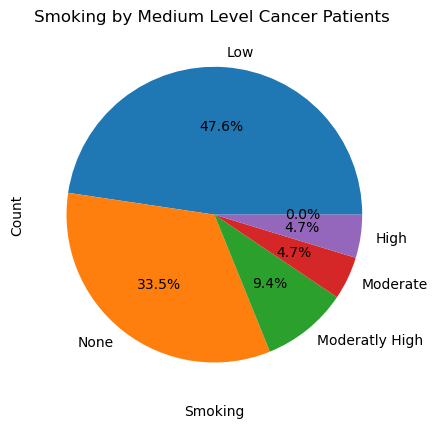

In [26]:
#Making a pie chart to display the percantage of smoking for medium level cancer patients.
smoking_bins_med = pd.cut(smoking_level_med["Smoking"], smoking_bins, labels=smoking_groups)
smoking_bins_med.value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.title("Smoking by Medium Level Cancer Patients ")
plt.show()

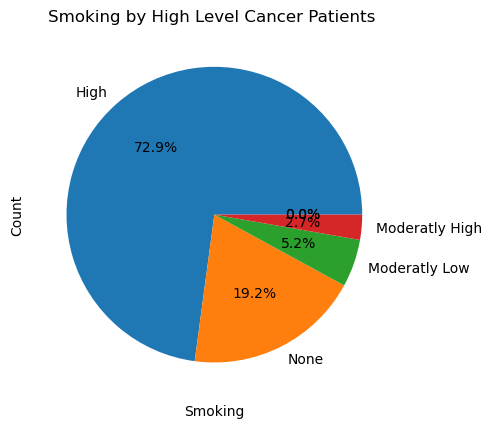

In [27]:
#Making a pie chart to display the percantage of smoking for high level cancer patients.
smoking_bins_high = pd.cut(smoking_level_high["Smoking"], smoking_bins, labels=smoking_groups)
smoking_bins_high.value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.title("Smoking by High Level Cancer Patients ")
plt.show()

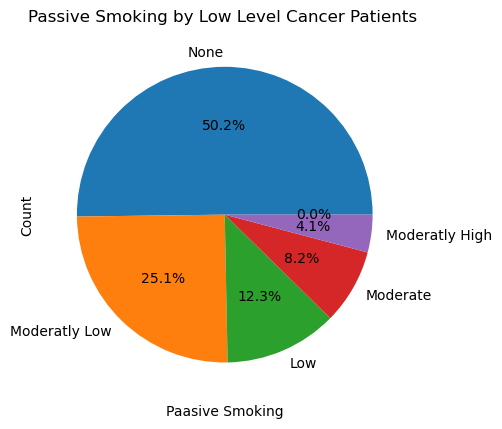

In [28]:
#Making a pie chart to display the percantage of smoking for low level cancer patients.
smoking_bins_low = pd.cut(smoking_level_low["Passive Smoker"], smoking_bins, labels=smoking_groups)
smoking_bins_low.value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.xlabel("Paasive Smoking")
plt.ylabel("Count")
plt.title("Passive Smoking by Low Level Cancer Patients ")
plt.show()

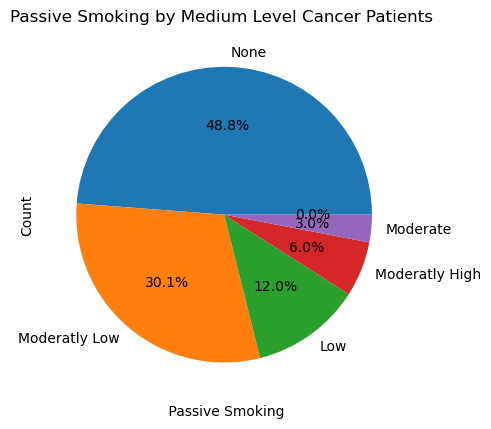

In [29]:
#Making a pie chart to display the percantage of passive smoking for medium level cancer patients.
smoking_bins_med = pd.cut(smoking_level_med["Passive Smoker"], smoking_bins, labels=smoking_groups)
smoking_bins_med.value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.xlabel(" Passive Smoking")
plt.ylabel("Count")
plt.title("Passive Smoking by Medium Level Cancer Patients ")
plt.show()

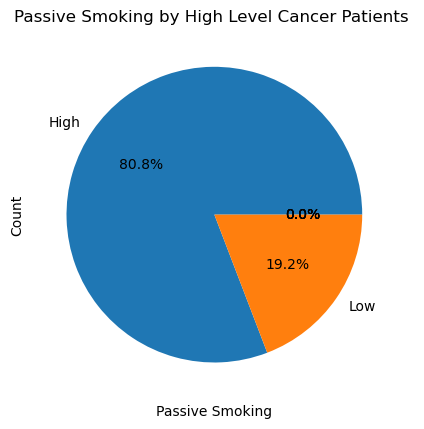

In [30]:
#Making a pie chart to display the percantage of passive smoking for high level cancer patients.
smoking_bins_high = pd.cut(smoking_level_high["Passive Smoker"], smoking_bins, labels=smoking_groups)
smoking_bins_high.value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.xlabel("Passive Smoking")
plt.ylabel("Count")
plt.title("Passive Smoking by High Level Cancer Patients ")
plt.show()